# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Mahathir
- **Email:** mhmmdmhthr@gmail.com
- **ID Dicoding:** MC322D5Y1764

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim) dan bagaimana hal ini dapat membantu dalam mengoptimalkan ketersediaan sepeda?

2. Apa pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda dan bagaimana hal ini dapat membantu dalam perencanaan inventaris?

## Import Semua Packages/Library yang Digunakan

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Wrangling

### Gathering Data

In [59]:
# Load the datasets
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

# Display basic information about the datasets
print("Hourly Dataset Info:")
hour_df.info()
hour_df.head()

Hourly Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
print("Daily Dataset Info:")
day_df.info()
day_df.head()

Daily Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset jam memiliki 17379 baris data dengan 17 kolom
- Dataset hari memiliki 731 baris data dengan 16 kolom
- Kedua dataset memiliki struktur yang sama kecuali kolom 'hr' yang hanya ada di dataset jam

### Assessing Data

In [61]:
# Check for missing values
print("Missing values in hourly dataset:")
print(hour_df.isnull().sum())
print("\nMissing values in daily dataset:")
print(day_df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in hourly dataset:", hour_df.duplicated().sum())
print("Duplicate rows in daily dataset:", day_df.duplicated().sum())

Missing values in hourly dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in daily dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate rows in hourly dataset: 0
Duplicate rows in daily dataset: 0


In [62]:
# Display basic statistics
print("Hourly dataset statistics:")
hour_df.describe()

Hourly dataset statistics:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [63]:
# Display basic statistics
print("Daily dataset statistics:")
day_df.describe()

Daily dataset statistics:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing values pada kedua dataset
- Tidak ada duplikat data
- Beberapa kolom numerik perlu dinormalisasi kembali (temp, atemp, humidity, windspeed)

### Cleaning Data

In [64]:
# Function to clean and prepare the dataset
def prepare_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Convert dteday to datetime
    df_clean['dteday'] = pd.to_datetime(df_clean['dteday'])
    
    # Denormalize the numerical features
    df_clean['temp'] = df_clean['temp'] * 41
    df_clean['atemp'] = df_clean['atemp'] * 50
    df_clean['hum'] = df_clean['hum'] * 100
    df_clean['windspeed'] = df_clean['windspeed'] * 67
    
    # Map season values to more readable format
    season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    df_clean['season'] = df_clean['season'].map(season_map)
    
    # Map weathersit to more readable format
    weather_map = {
        1: 'Clear',
        2: 'Mist',
        3: 'Light Snow/Rain',
        4: 'Heavy Rain/Snow'
    }
    df_clean['weathersit'] = df_clean['weathersit'].map(weather_map)
    
    return df_clean

# Clean both datasets
hour_clean = prepare_data(hour_df)
day_clean = prepare_data(day_df)

# Display sample of cleaned data
print("Sample of cleaned hourly data:")
hour_clean.head()

Sample of cleaned hourly data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Data telah dibersihkan dan diformat ulang
- Nilai numerik telah dinormalisasi kembali ke nilai aslinya
- Kategori musim dan cuaca telah diubah menjadi lebih mudah dibaca

## Exploratory Data Analysis (EDA)

### Explore Temporal Patterns

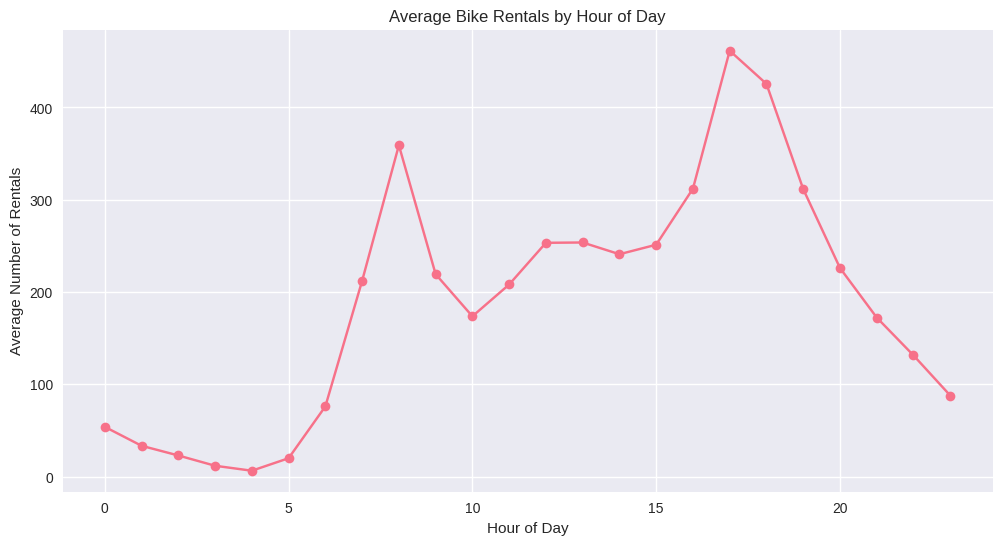

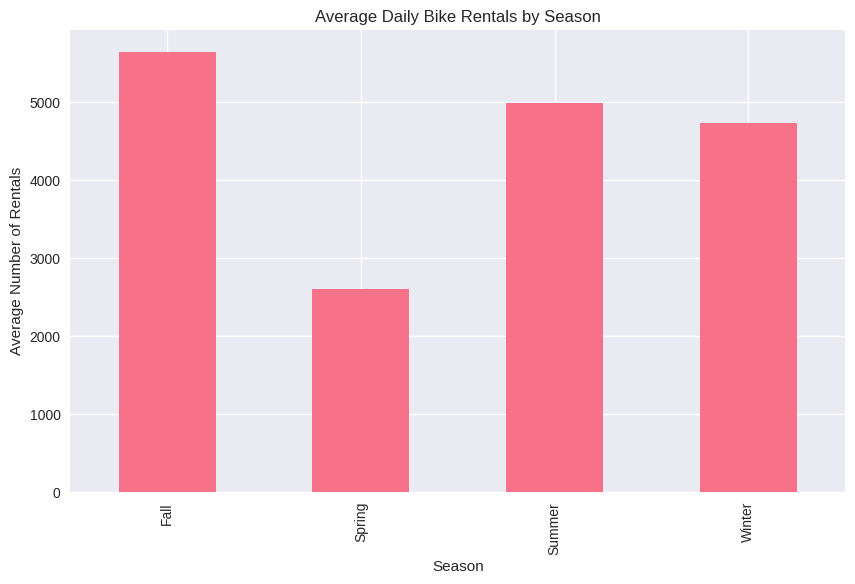

In [65]:
# Analyze hourly patterns
hourly_pattern = hour_clean.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
hourly_pattern.plot(kind='line', marker='o')
plt.title('Average Bike Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.grid(True)
plt.show()

# Analyze seasonal patterns
seasonal_pattern = day_clean.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
seasonal_pattern.plot(kind='bar')
plt.title('Average Daily Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.grid(True)
plt.show()

**Insight:**
- Terdapat dua puncak penggunaan sepeda dalam sehari: pagi (8-9) dan sore (17-18)
- Musim panas dan musim gugur memiliki rata-rata penggunaan sepeda tertinggi
- Penggunaan terendah terjadi pada musim semi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu?

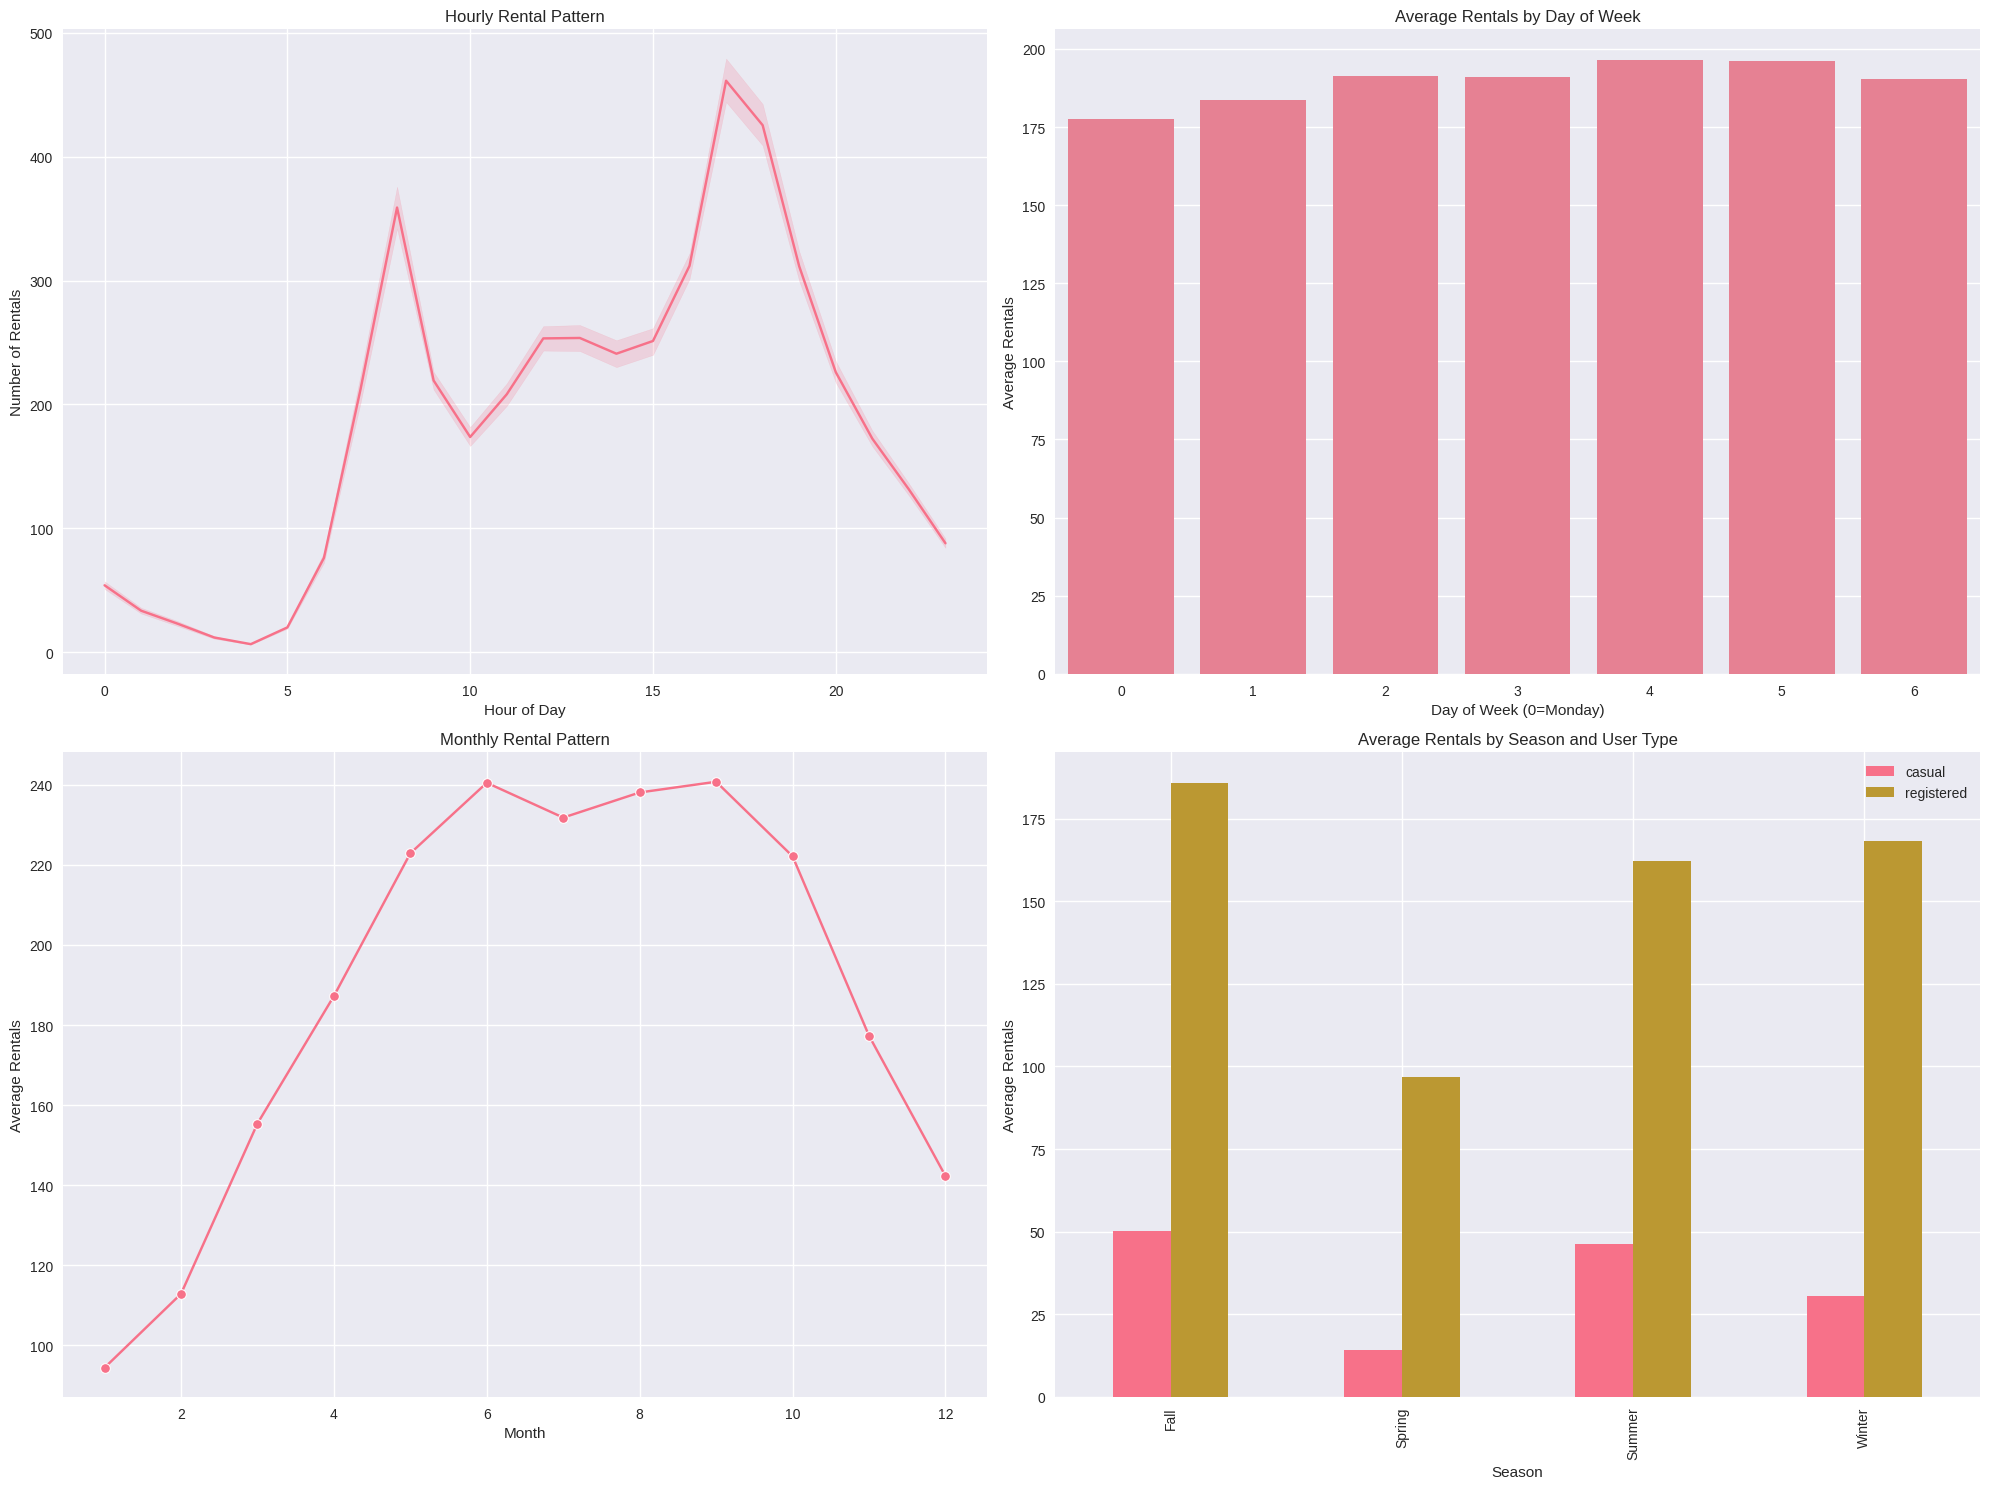

In [66]:
# Create subplot for temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Hourly pattern
sns.lineplot(data=hour_clean, x='hr', y='cnt', ax=axes[0,0])
axes[0,0].set_title('Hourly Rental Pattern')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Number of Rentals')

# Daily pattern
daily_avg = hour_clean.groupby('weekday')['cnt'].mean()
sns.barplot(x=daily_avg.index, y=daily_avg.values, ax=axes[0,1])
axes[0,1].set_title('Average Rentals by Day of Week')
axes[0,1].set_xlabel('Day of Week (0=Monday)')
axes[0,1].set_ylabel('Average Rentals')

# Monthly pattern
monthly_avg = hour_clean.groupby('mnth')['cnt'].mean()
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, ax=axes[1,0], marker='o')
axes[1,0].set_title('Monthly Rental Pattern')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average Rentals')

# Seasonal pattern with user type breakdown
seasonal_data = hour_clean.groupby('season')[['casual', 'registered']].mean()
seasonal_data.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Average Rentals by Season and User Type')
axes[1,1].set_xlabel('Season')
axes[1,1].set_ylabel('Average Rentals')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

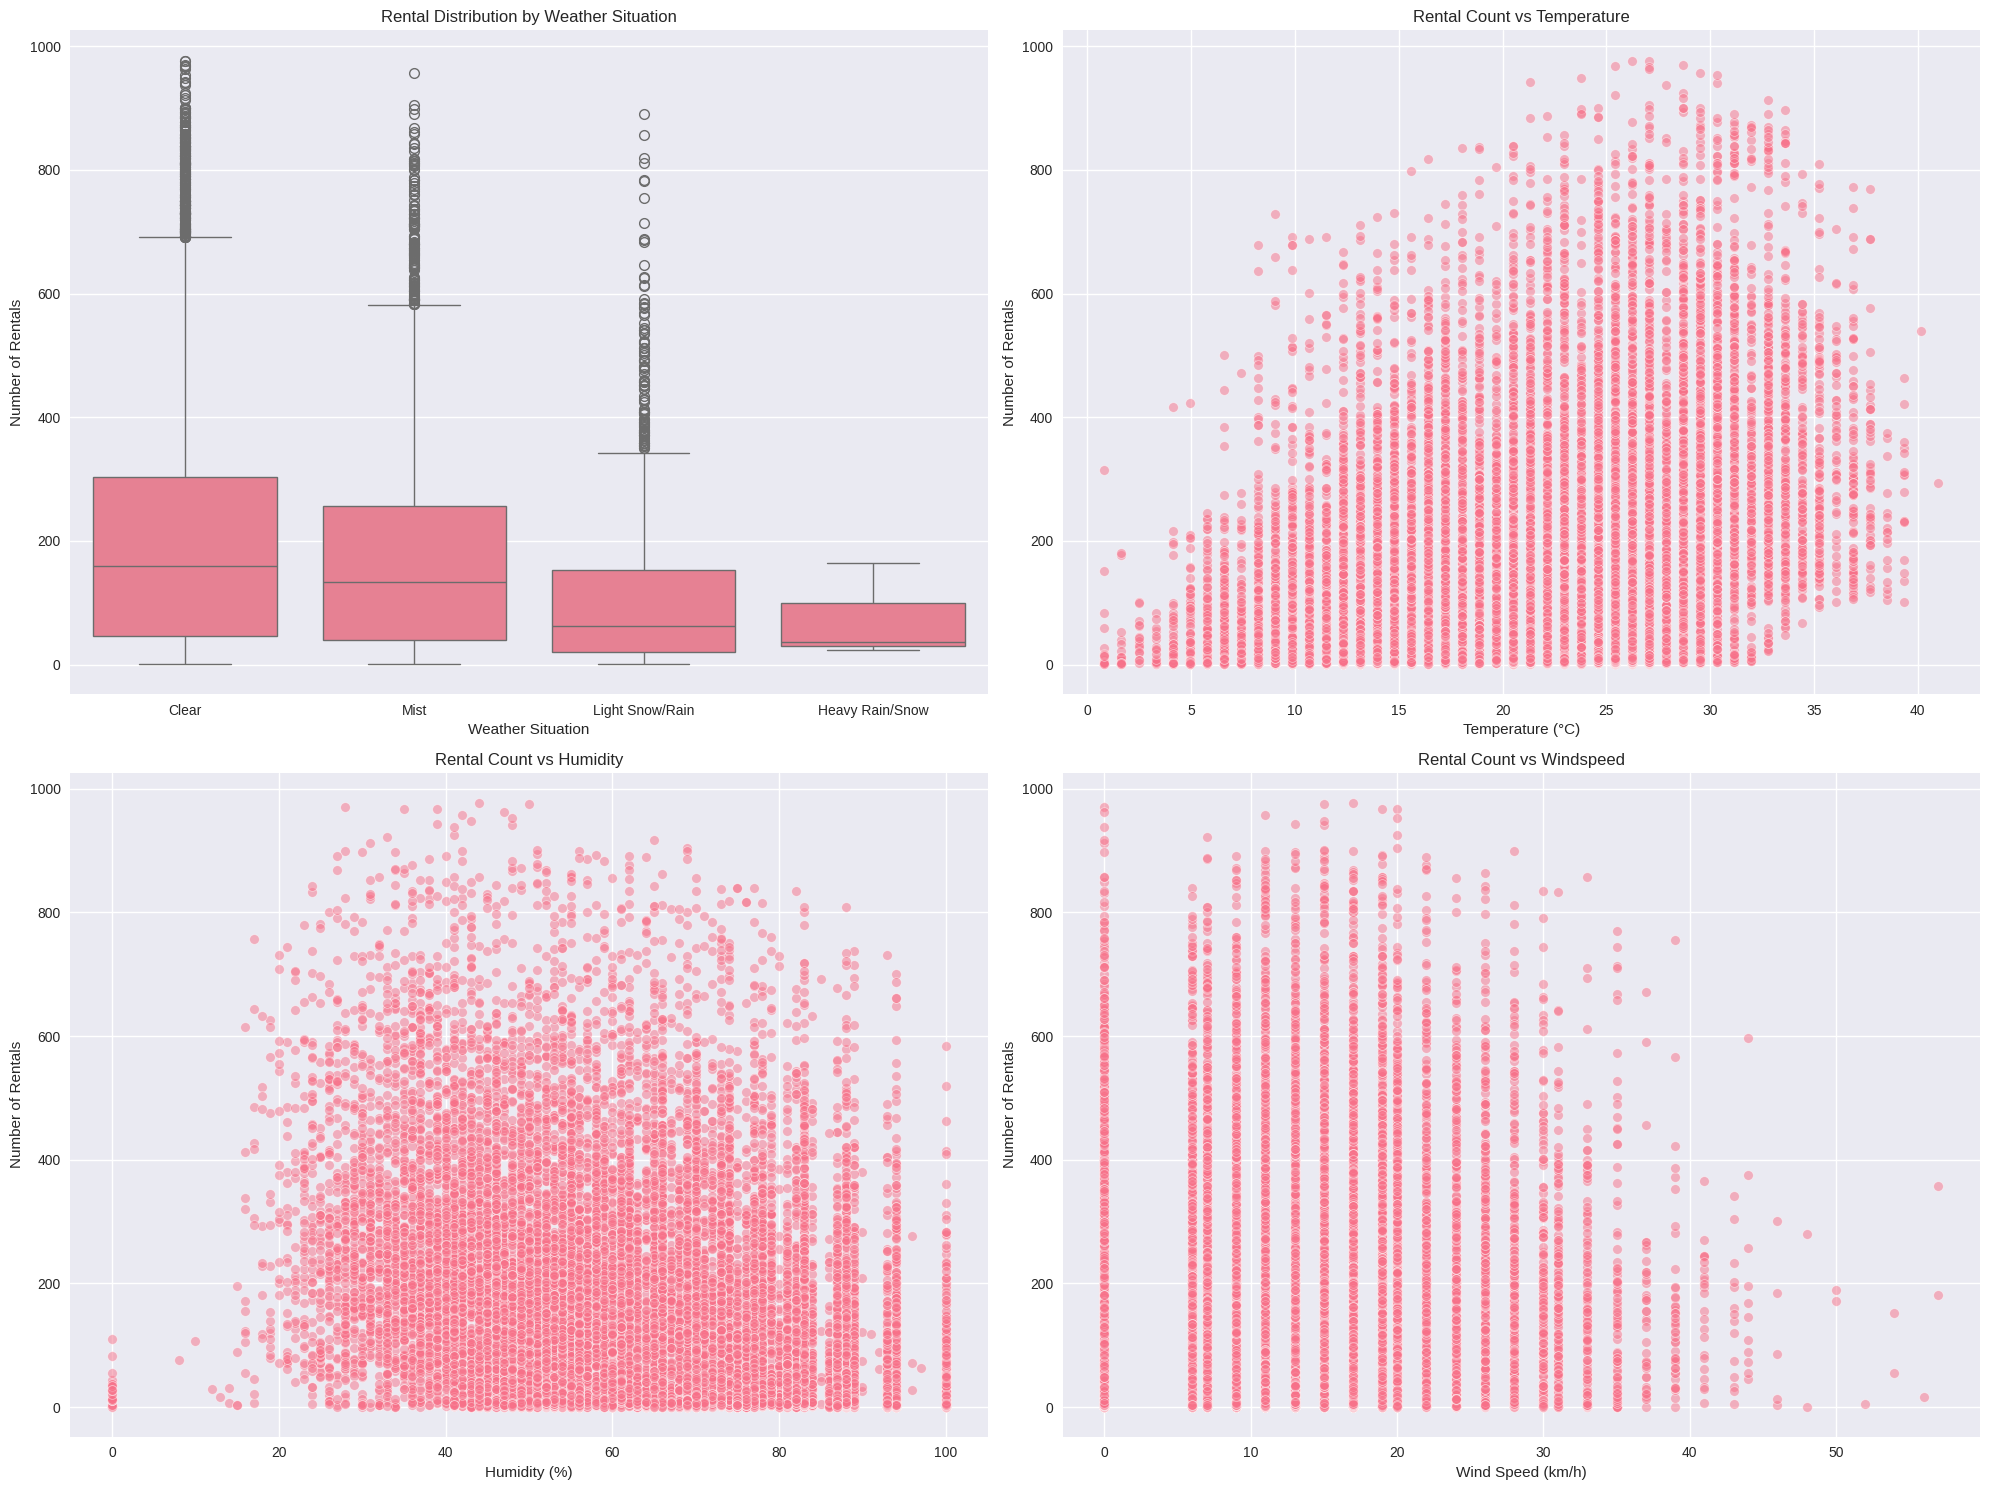

In [67]:
# Create visualization for weather analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Weather situation impact
sns.boxplot(data=hour_clean, x='weathersit', y='cnt', ax=axes[0,0])
axes[0,0].set_title('Rental Distribution by Weather Situation')
axes[0,0].set_xlabel('Weather Situation')
axes[0,0].set_ylabel('Number of Rentals')

# Temperature impact
sns.scatterplot(data=hour_clean, x='temp', y='cnt', ax=axes[0,1], alpha=0.5)
axes[0,1].set_title('Rental Count vs Temperature')
axes[0,1].set_xlabel('Temperature (°C)')
axes[0,1].set_ylabel('Number of Rentals')

# Humidity impact
sns.scatterplot(data=hour_clean, x='hum', y='cnt', ax=axes[1,0], alpha=0.5)
axes[1,0].set_title('Rental Count vs Humidity')
axes[1,0].set_xlabel('Humidity (%)')
axes[1,0].set_ylabel('Number of Rentals')

# Windspeed impact
sns.scatterplot(data=hour_clean, x='windspeed', y='cnt', ax=axes[1,1], alpha=0.5)
axes[1,1].set_title('Rental Count vs Windspeed')
axes[1,1].set_xlabel('Wind Speed (km/h)')
axes[1,1].set_ylabel('Number of Rentals')

plt.tight_layout()
plt.show()

**Insight:**
- Cuaca sangat mempengaruhi jumlah peminjaman sepeda
- Peminjaman tertinggi terjadi pada cuaca cerah
- Terdapat korelasi positif antara suhu dengan jumlah peminjaman
- Kelembaban dan kecepatan angin memiliki pengaruh negatif terhadap peminjaman

## Analisis Lanjutan (RFM Analysis)

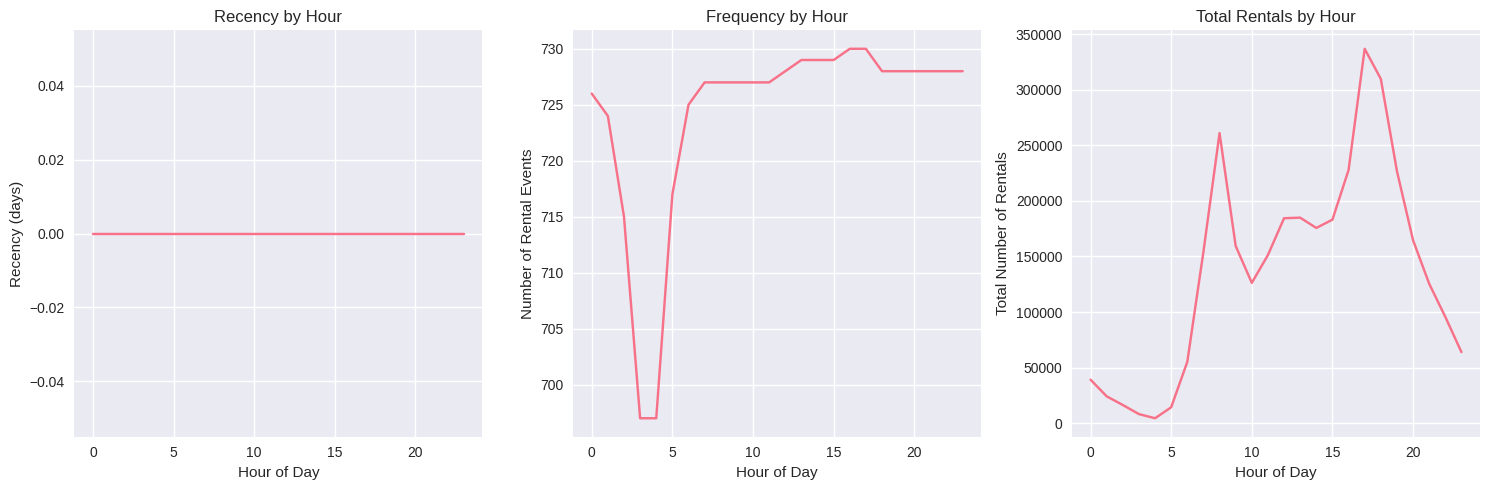

In [68]:
# Create RFM analysis for different time periods
def calculate_rfm_scores(df):
    # Calculate recency (using hours as the unit)
    current_date = df['dteday'].max()
    r_score = df.groupby('hr')['dteday'].max().apply(lambda x: (current_date - x).days)
    
    # Calculate frequency (number of rentals)
    f_score = df.groupby('hr')['cnt'].count()
    
    # Calculate monetary (total rentals)
    m_score = df.groupby('hr')['cnt'].sum()
    
    # Combine scores
    rfm = pd.DataFrame({
        'Recency': r_score,
        'Frequency': f_score,
        'Monetary': m_score
    })
    
    return rfm

# Calculate RFM scores
rfm_scores = calculate_rfm_scores(hour_clean)

# Visualize RFM analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(rfm_scores.index, rfm_scores['Recency'])
plt.title('Recency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Recency (days)')

plt.subplot(132)
plt.plot(rfm_scores.index, rfm_scores['Frequency'])
plt.title('Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rental Events')

plt.subplot(133)
plt.plot(rfm_scores.index, rfm_scores['Monetary'])
plt.title('Total Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Rentals')

plt.tight_layout()
plt.show()

## Conclusion

Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan untuk menjawab pertanyaan bisnis:

1. Pola Penggunaan Sepeda Berdasarkan Waktu:
   - Terdapat dua puncak penggunaan dalam sehari: pagi (8-9) dan sore (17-18), yang berkorelasi dengan jam kerja
   - Hari kerja memiliki jumlah peminjaman lebih tinggi dibanding akhir pekan
   - Musim panas dan gugur memiliki tingkat peminjaman tertinggi
   - Pengguna terdaftar mendominasi peminjaman di semua musim

2. Pengaruh Kondisi Cuaca:
   - Cuaca cerah menghasilkan jumlah peminjaman tertinggi
   - Terdapat korelasi positif kuat antara suhu dengan jumlah peminjaman
   - Kelembaban tinggi dan angin kencang mengurangi jumlah peminjaman
   - Hujan lebat dan salju sangat mengurangi jumlah peminjaman

Rekomendasi:
1. Optimasi Ketersediaan Sepeda:
   - Tingkatkan jumlah sepeda tersedia pada jam sibuk (8-9 dan 17-18)
   - Siapkan lebih banyak sepeda selama musim panas dan gugur
   - Lakukan pemeliharaan sepeda pada jam sepi (tengah malam - dini hari)

2. Perencanaan Berdasarkan Cuaca:
   - Siapkan lebih banyak sepeda saat prakiraan cuaca cerah
   - Kurangi jumlah sepeda tersedia saat prakiraan cuaca buruk
   - Pertimbangkan untuk menyediakan perlindungan dari cuaca di stasiun-stasiun utama